# Reading the Data inot pandas

In [10]:
import pandas as pd 
df = pd.read_csv("PK COVID-19-3jun.csv")
df

,Date,Cases,Deaths,Recovered,Travel_history,Province,City
0,2/26/2020,1,0,0,China,Islamabad Capital Territory,Islamabad
1,2/26/2020,2,0,0,Iran/Taftan,Sindh,Karachi
2,2/29/2020,1,0,0,China,Islamabad Capital Territory,Islamabad
3,2/29/2020,1,0,0,Iran/Taftan,Sindh,Karachi
4,3/2/2020,1,0,0,Iran/Taftan,Gilgit-Baltistan,Gilgit
...,...,...,...,...,...,...,...
2793,5/30/2020,952,36,394,NaN,Punjab,Lahore
2794,5/31/2020,1184,22,120,NaN,Punjab,Lahore
2795,6/1/2020,1610,43,95,NaN,Punjab,Lahore
2796,6/2/2020,1639,30,353,NaN,Punjab,Lahore


# Dropping NULL rows from the Dataframe

In [12]:
df = df.dropna()

In [23]:
df

,Date,Cases,Deaths,Recovered,Travel_history,Province,City
0,2/26/2020,1,0,0,China,Islamabad Capital Territory,ISLAMABAD
1,2/26/2020,2,0,0,Iran/Taftan,Sindh,KARACHI
2,2/29/2020,1,0,0,China,Islamabad Capital Territory,ISLAMABAD
3,2/29/2020,1,0,0,Iran/Taftan,Sindh,KARACHI
4,3/2/2020,1,0,0,Iran/Taftan,Gilgit-Baltistan,GILGIT
...,...,...,...,...,...,...,...
2757,5/30/2020,17,0,54,Local - Social Contact,Azad Jummu Kashmir,MUZAFFARABAD
2758,5/31/2020,4,0,9,Local - Social Contact,Azad Jummu Kashmir,MUZAFFARABAD
2759,6/1/2020,16,0,2,Local - Social Contact,Azad Jummu Kashmir,MUZAFFARABAD
2760,6/2/2020,13,1,0,Local - Social Contact,Azad Jummu Kashmir,MUZAFFARABAD


# Converting City Column record into Uppercase

In [19]:
df['City'] = df['City'].str.upper()

<ipython-input-19-af65e7765760>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'] = df['City'].str.upper()


In [29]:
city_df = (df.groupby('City')
    .agg({'Cases':'sum', 'Deaths': 'sum'})
    .reset_index().rename(columns={'Cases':'TotalCases'}) )

In [30]:
city_df

,City,TotalCases,Deaths
0,ABBOTTABAD,279,14
1,ASTORE,69,14
2,ATTOCK,15,0
3,BADIN,56,4
4,BAHAWAL NAGAR,21,0
...,...,...,...
123,TORGHAR,2,0
124,TRARKHEL,1,0
125,UMERKOT,9,1
126,VEHARI,72,0


In [63]:
print('CITY WITH THE HIGHEST NUMBER OF COVID-19 CASES')
print(city_df[city_df.TotalCases == city_df.TotalCases.max()])

CITY WITH THE HIGHEST NUMBER OF COVID-19 CASES
       City  TotalCases  Deaths
45  KARACHI       29346     498


In [33]:
df['Province'] = df['Province'].str.upper()

<ipython-input-33-1c59e1fb17cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Province'] = df['Province'].str.upper()


In [34]:
province_df = (df.groupby('Province')
    .agg({'Cases':'sum', 'Deaths': 'sum'})
    .reset_index().rename(columns={'Cases':'TotalCases'}) )

In [35]:
province_df

,Province,TotalCases,Deaths
0,AZAD JUMMU KASHMIR,285,6
1,BALUCHISTAN,2445,34
2,FEDERAL ADMINISTRATION TRIBAL AREA,53,1
3,GILGIT-BALTISTAN,787,24
4,ISLAMABAD CAPITAL TERRITORY,3523,36
5,KHYBER PAKHTUNKHWA,10259,473
6,PUNJAB,14576,238
7,SINDH,32858,546


In [62]:
print('PROVINCE WITH THE HIGHEST NUMBER OF COVID-19 CASES')
print(province_df[province_df.TotalCases == province_df.TotalCases.max()])

PROVINCE WITH THE HIGHEST NUMBER OF COVID-19 CASES
  Province  TotalCases  Deaths
7    SINDH       32858     546


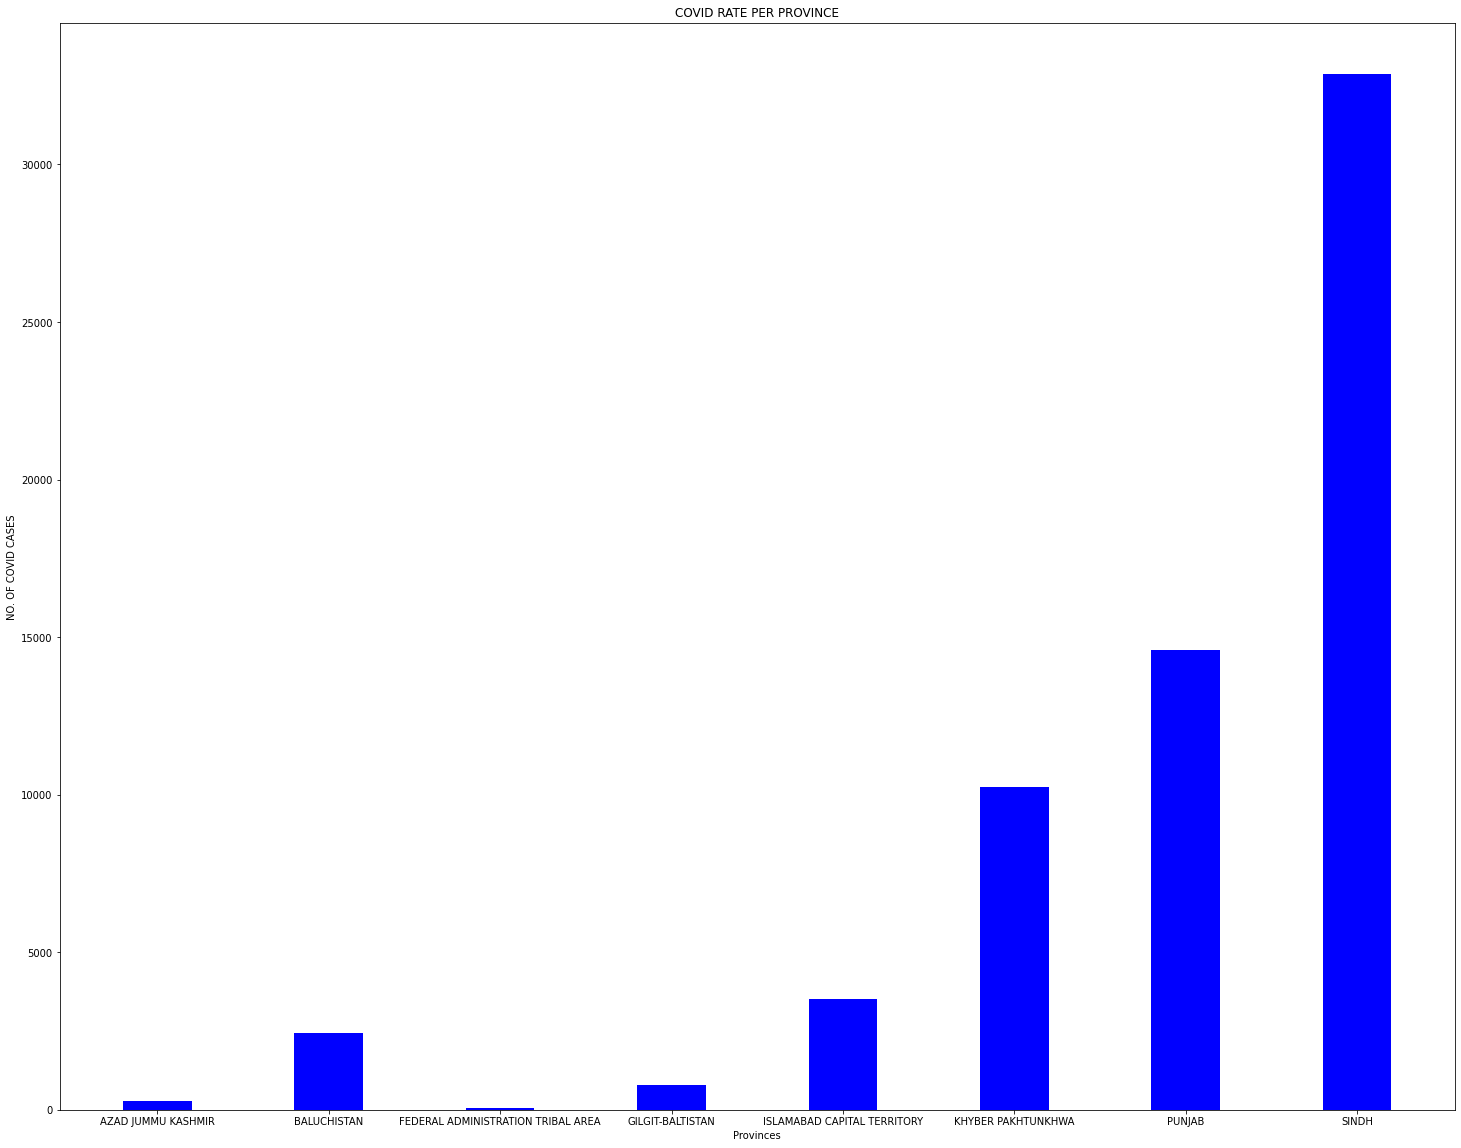

In [64]:
import matplotlib.pylab as plt
import numpy as np

province = province_df['Province']
values = province_df['TotalCases']
  
fig = plt.figure(figsize = (25, 20))
 
# creating the bar plot
plt.bar(province, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Provinces")
plt.ylabel("NO. OF COVID CASES")
plt.title("COVID RATE PER PROVINCE")
plt.show()

In [42]:
date_df = (df.groupby('Date')
    .agg({'Cases':'sum', 'Deaths': 'sum'})
    .reset_index().rename(columns={'Cases':'TotalCases'}) )

In [44]:
date_df

,Date,TotalCases,Deaths
0,2/26/2020,3,0
1,2/29/2020,2,0
2,3/10/2020,3,0
3,3/11/2020,1,0
4,3/12/2020,1,0
...,...,...,...
86,5/8/2020,1829,31
87,5/9/2020,2554,19
88,6/1/2020,2207,33
89,6/2/2020,2198,39


In [45]:
date_df['Date'] = pd.to_datetime(date_df['Date'])


In [70]:
monthCases = date_df.groupby(date_df['Date'].dt.strftime('%B'))['TotalCases'].sum().sort_values()

In [73]:
monthCases

Date
February        5
March        1965
June         7096
April       14389
May         41331
Name: TotalCases, dtype: int64

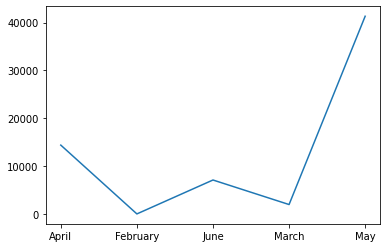

In [72]:
myList = monthCases.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.plot(x, y)
plt.show()

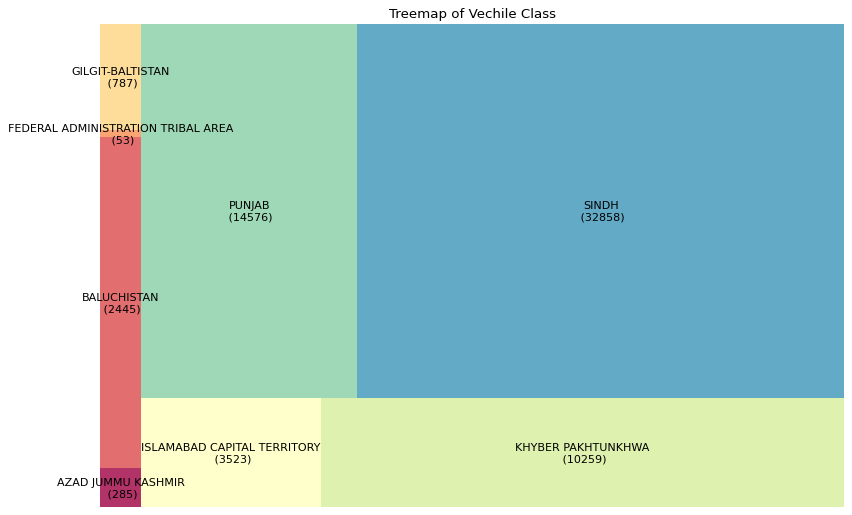

In [51]:
import squarify 

labels = province_df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = province_df['TotalCases'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Provinces')
plt.axis('off')
plt.show()